## Getting Ready

In [ ]:
# Install ultralytics
!pip install ultralytics==8.0.20

In [ ]:
# Install pytube to download the video for prediction (optional)
!pip install pytube

In [ ]:
# Imports
from IPython import Image
import ultralytics
from ultralytics import YOLO
from pytube import YouTube

In [ ]:
ultralytics.checks()

In [ ]:
# Make a directory for the dataset
!mkdir /content/MeetBuckbeak

In [ ]:
# Unzip the dataset zip file downloaded from Roboflow
!unzip /content/MeetBuckbeak.zip -d /content/MeetBuckbeak

## Train

In [ ]:
%cd /content
!yolo task=detect mode=train model=yolov8s.pt data=MeetBuckbeak/data.yaml batch=16 epochs=50 imgsz=800 plots=True

In [ ]:
# make train >> train2 if you run train the model twice
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

/content


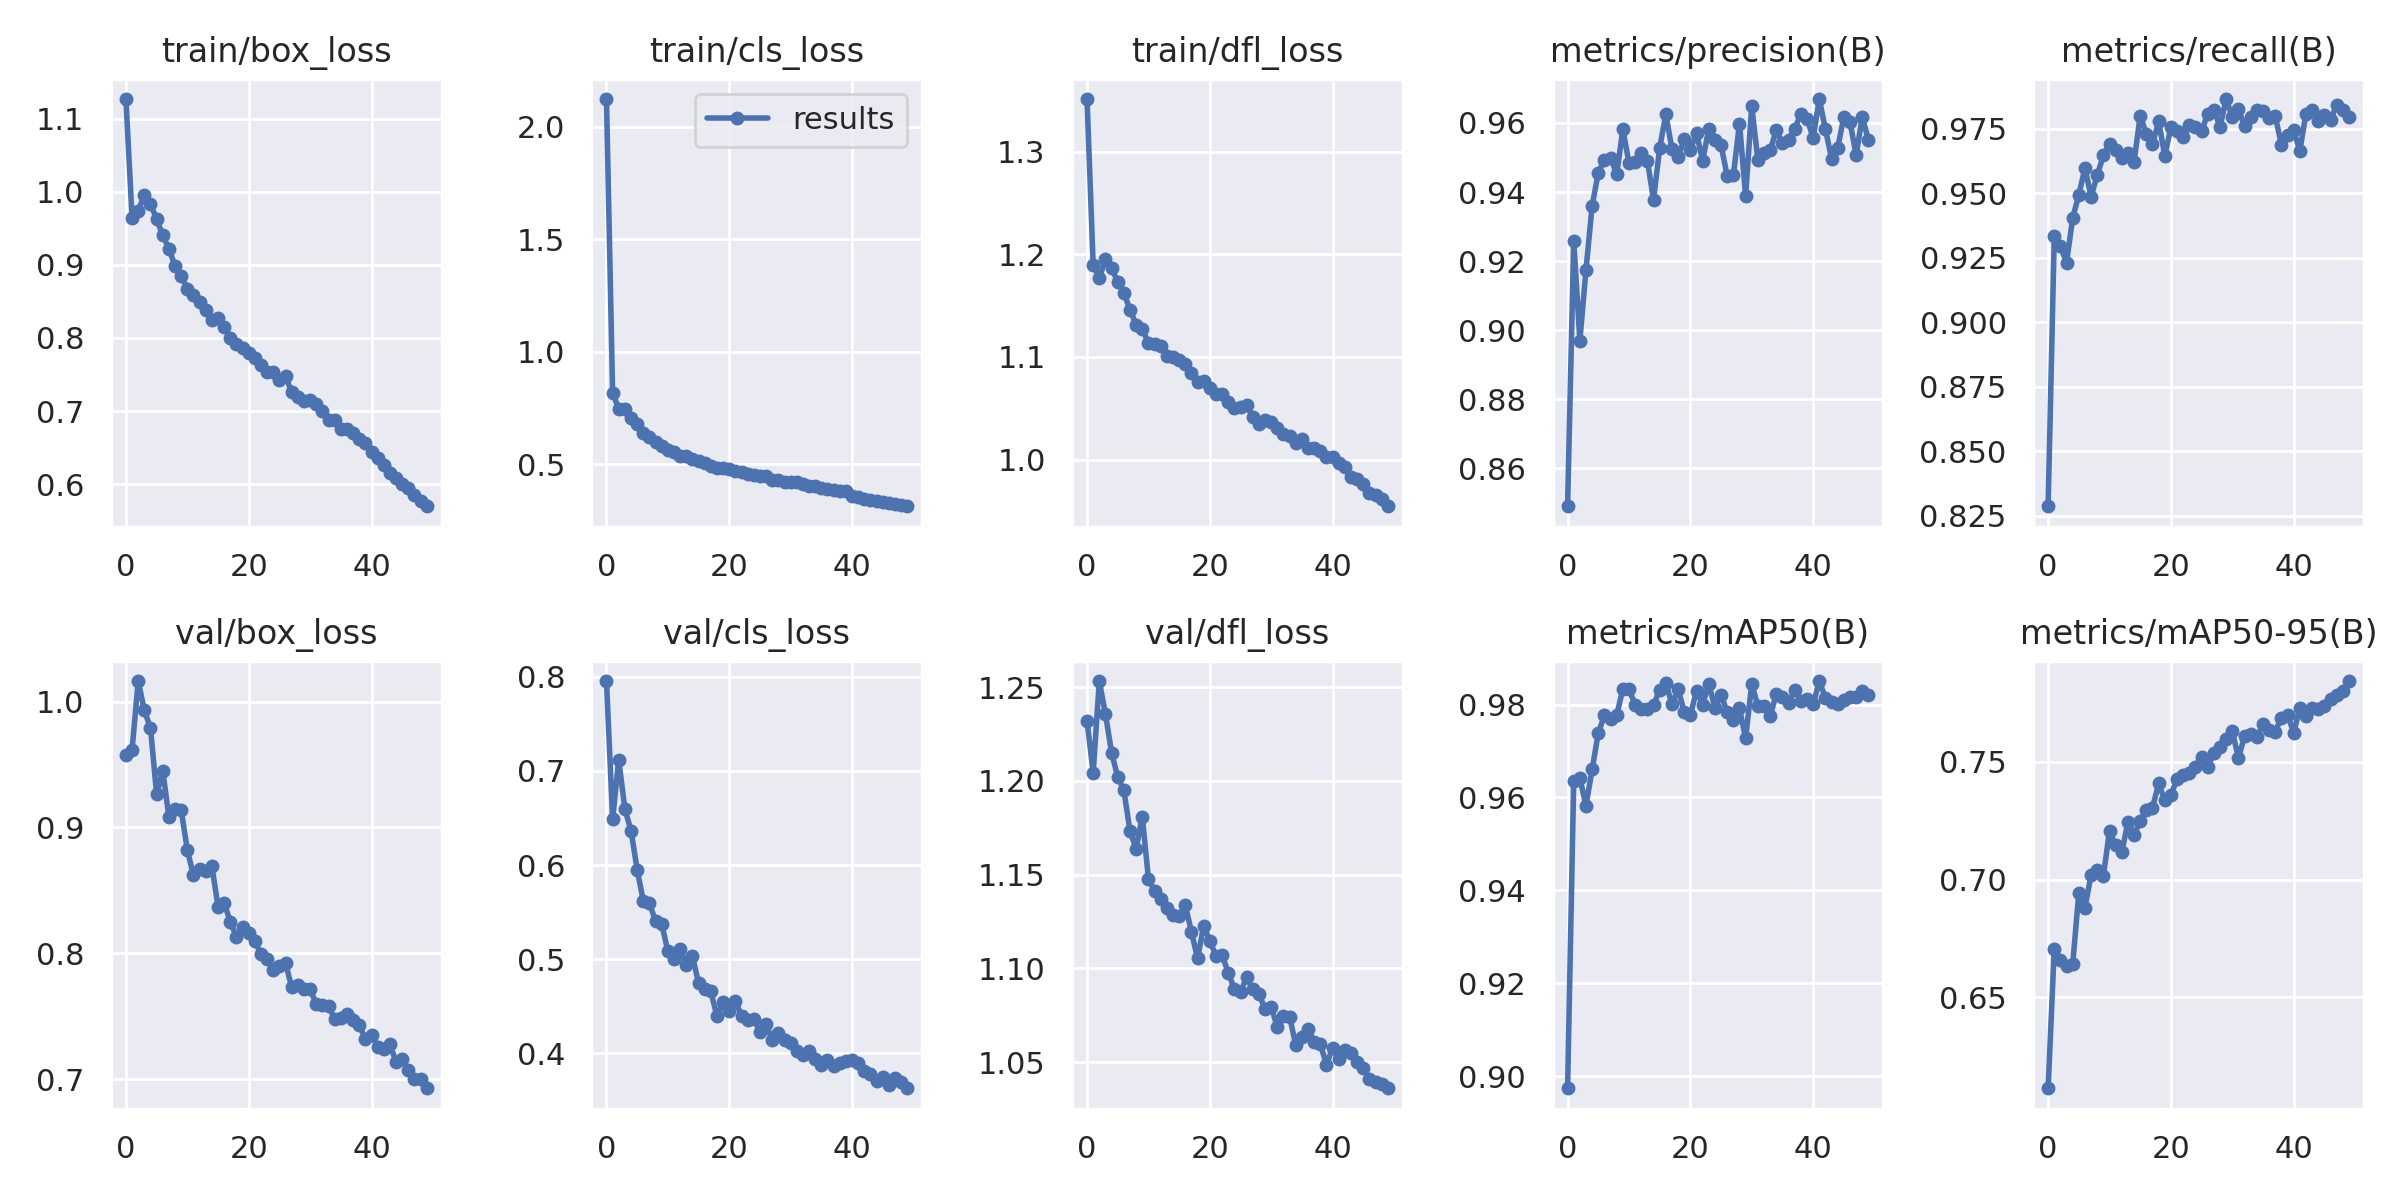

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

## Validate

In [ ]:
%cd /content
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=MeetBuckbeak/data.yaml

## Predict

In [ ]:
%cd /content
link = "https://www.youtube.com/watch?v=71xBu_VHTfY"
youtubeObject = YouTube(link)
youtubeObject = youtubeObject.streams.get_highest_resolution()
try:
    youtubeObject.download()
except:
    print("An error has occurred")

src = 'Meet Buckbeak  Harry Potter and the Prisoner of the Azkaban.mp4'
dst = 'meet-buckbeak.mp4'
# Rename the file
os.rename(src, dst)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt save=True conf=0.7 source=meet-buckbeak.mp4